# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Crypto coins are likely to stay and right now, one of the major coin and key indicator in predicting both major and alternative coins prices is ETH or Ethereum. This capstone will explore this coins from its volumes everyday from January 2020-June 2021. The library used in this capstone is BeautifulSoap 4+ for its simplicity.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [85]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))
soup

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7');</script>
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-solid-900.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" 

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [12]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:5000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center

Finding row length.

In [24]:
temp = soup.find_all('th',attrs={'class':'font-semibold text-center'})
row_length = len(temp)
row_length

547

To see if the data is right or not:

In [25]:
soup.find_all('th',attrs={'class':'font-semibold text-center'})[0].text

'2021-06-30'

In [48]:
soup.find_all('th',attrs={'class':'text-center'})[2].text

'Volume'

The data that will be used is date and volume, for this we need to loop both data.
Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the volume.
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [49]:
temp = [] #init

for i in range(1, row_length):
    
    #get period 
    period=soup.find_all('th',attrs={'class':'font-semibold text-center'})[i].text
    period=period.strip('\n')#to remove excess white space
    
    #get volume
    volume=soup.find_all('td',attrs={'class':'text-center'})[i*4+1].text
    volume=volume.strip('\n') #to remove excess white space
   
    temp.append((period,volume)) 
    
temp

[('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856,525'),
 ('2021-06-02', '$39,898,648

We want to see the data from earlist to latest, so we need to reverse it:

In [72]:
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [73]:
import pandas as pd

df = pd.DataFrame(temp,columns=('period','volume'))
df.head()

,period,volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [74]:
df.dtypes

period    object
volume    object
dtype: object

As you can see, the datatypes are still incorrect, to correct it, we need to change some of the data and change it into its appropriate data type.

In [78]:
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].str.replace("$","")
df['volume'] = df['volume'].astype('float64')
df['period'] = df['period'].astype('datetime64')

df.dtypes

C:\Users\ARIS\AppData\Local\Temp/ipykernel_12624/348716061.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","")


period    datetime64[ns]
volume           float64
dtype: object

to showcase if the changes are correct

In [89]:
df.head()

,volume
period,
2020-01-01,7.103187e+09
2020-01-02,6.623732e+09
2020-01-03,6.497298e+09
2020-01-04,9.655245e+09
2020-01-05,6.958394e+09


For data visualization, we need to first set the index to the time column with `set_index()`, then we need to make a plot with appropriate x axis label, y axis label and title.

In [ ]:
df=df.set_index('period')

<AxesSubplot:title={'center':'ETH Volumes January 2020-June 2021'}, xlabel='period', ylabel='volume per $100 million'>

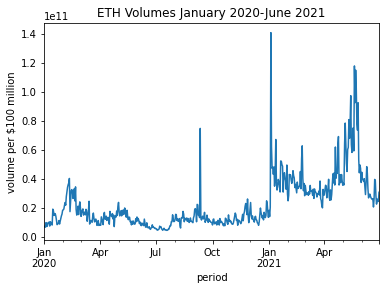

In [88]:
df['volume'].plot(
    xlabel='period',
    ylabel='volume per $100 million',
    title='ETH Volumes January 2020-June 2021'
)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

True to its nature as crypto coins, even a major coin like ETH have major and visible volume fluctuations. The volume reached its January 2020-June 2021 all time high around January 2021 with the coin sharply declining before rising again around April 2021 to its second all time high until decliniing again since.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.